In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import folium
from folium import Map, Marker
from folium.plugins import MarkerCluster
import json
from folium import Choropleth

# Рынок заведений общественного питания Москвы

Введение.
Краткое описание проекта: Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

Описание данных: мы имеем датасет с данными о заведениях общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 
    
Цели исследования: подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.
    
План исследования: первым шагом сделаем предобработку данных, затем проведём анализ данных, 

## Предобработка данных 

In [54]:
#загрузим и откроем датафрейм
data = pd.read_csv('/datasets/moscow_places.csv')
display(data)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86.0
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150.0
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,0,150.0
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150.0


In [55]:
display("Информация о датафрейме:", data.info())
print('*'*50)
display("Пропущенные значения:", data.isna().sum())
print('*'*50)
display("Сумма полных дубликатов:", data.duplicated().sum())
print('*'*50)
display("Сумма дубликатов при учете одновременно name и address:", data[['name', 'address']].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


'Информация о датафрейме:'

None

**************************************************


'Пропущенные значения:'

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

**************************************************


'Сумма полных дубликатов:'

0

**************************************************


'Сумма дубликатов при учете одновременно name и address:'

0

In [56]:
#data.query('category == "кафе"')['seats'].isna().sum()

In [57]:
#data.query('category == "кофейня"')['seats'].isna().sum()

Итак, мы имеем датафрейм с 8406 строками, 14 столбцами; названия столбцов в "змеином стиле", изменять их не нужно; 6 столбцов имеют пропуски: 

Больше всего пропусков в столбцах middle_coffee_cup - число с оценкой одной чашки капучино - 7871 пропуск(),  middle_avg_bill-  число с оценкой среднего чека - 5257 пропусков, price - с категориями цен в заведении - 5091 пропуск, а
avg_bill -столбец с данными о средней стоимости заказа в виде диапазона имеет 4590 пропусков. Меньше всего пропусков в столбцах seats(количество посадочных мест) - 3611 пропусков и hours(информация о днях и часах работы) - 536 пропусков.

В самых важных столбцах пропусков нет.

По стилю ничего изменять не надо.

Заменим медианным значением пропуски в столбцах middle_coffee_cup и seats:

In [58]:
#for d in data['district'].unique():
    #data.loc[(data['district'] == d) & (data['middle_avg_bill'].isna()), 'middle_avg_bill'] = \
    #data.loc[(data['district'] == d), 'middle_avg_bill'].median()

In [59]:
def funsion(value_1, value_2):
    for d in data[value_1].unique():
        data.loc[(data[value_1] == d) & (data[value_2].isna()), value_2] = \
        data.loc[(data[value_1] == d), value_2].median()
    return

In [60]:
m_v_b=funsion('district', 'middle_avg_bill')
s = funsion('category', 'seats')

In [61]:
#data['middle_coffee_cup'] = data['middle_coffee_cup'].fillna(0)
#data['hours'] = data['hours'].fillna(0)
#data['price'] = data['price'].fillna(0)
#data['avg_bill'] = data['avg_bill'].fillna(0)

In [62]:
data[['hours', 'price', 'avg_bill']] = data[['hours', 'price', 'avg_bill']].fillna(0)

In [63]:
#проверим, произошли ли изменения
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                   0
lat                     0
lng                     0
rating                  0
price                   0
avg_bill                0
middle_avg_bill         0
middle_coffee_cup    7871
chain                   0
seats                   0
dtype: int64

<AxesSubplot:>

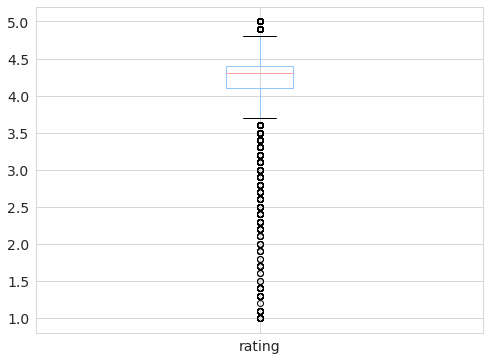

In [64]:
plt.figure(figsize=(8, 6))
data.boxplot(['rating'])

<AxesSubplot:>

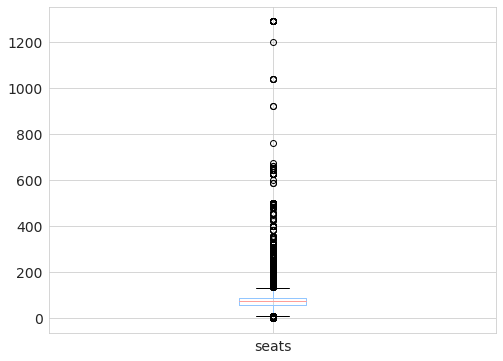

In [65]:
plt.figure(figsize=(8, 6))
data.boxplot(['seats'])

<AxesSubplot:>

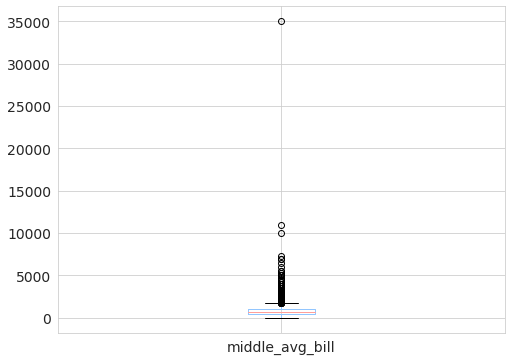

In [66]:
plt.figure(figsize=(8, 6))
data.boxplot(['middle_avg_bill'])

<AxesSubplot:>

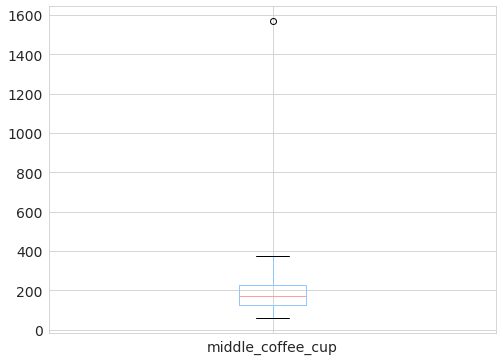

In [67]:
plt.figure(figsize=(8, 6))
data.boxplot(['middle_coffee_cup'])

Cтолбцы rating и seats трогать не будем, а в столбцах middle_avg_bill и middle_coffee_cup есть выбросы в виде больших сумм, которые могут исказить исследование, их уберём.

In [68]:
data = data.query('middle_avg_bill < 5000')
data = data.query('middle_coffee_cup != 1568.0')
data.count()

name                 8388
category             8388
address              8388
district             8388
hours                8388
lat                  8388
lng                  8388
rating               8388
price                8388
avg_bill             8388
middle_avg_bill      8388
middle_coffee_cup     534
chain                8388
seats                8388
dtype: int64

Мы потеряли менее 1% данных

In [69]:
#Добавим столбец с названием улицы
test="Москва, улица Дыбенко, 36, корп. 1"
def get_street(address_string):
    return address_string.split(',')[1]

data['street']=data['address'].apply(get_street)

#проверим, добавился ли столбец
data['street'].head()

0               улица Дыбенко
1               улица Дыбенко
2          Клязьминская улица
3     улица Маршала Федоренко
4         Правобережная улица
Name: street, dtype: object

In [70]:
#Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
#логическое значение True — если заведение работает ежедневно и круглосуточно;
#логическое значение False — в противоположном случае.
p =[]
for i in data['hours']:
    if i == "ежедневно, круглосуточно":
        p.append("True")
    else:
        p.append("False")

#проверим, добавился ли столбец
data['is_24_7'] = p
data['is_24_7'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_24_7, dtype: object

## Анализ данных

In [71]:
#Какие категории заведений представлены в данных? 
#Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. 
#Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.
print("В данных представлены следующие категории заведений:", data['category'].unique())

В данных представлены следующие категории заведений: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


кафе               2378
ресторан           2029
кофейня            1412
бар,паб             763
пиццерия            633
быстрое питание     602
столовая            315
булочная            256
Name: category, dtype: int64


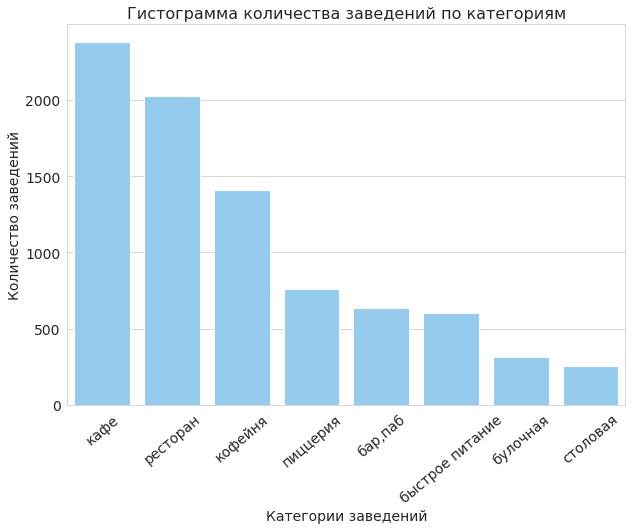

In [72]:
print(data['category'].value_counts())
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10, 7))
sb.set_style('whitegrid') 

x = data['category'].unique()
y=data['category'].value_counts().sort_values(ascending=False)
sb.barplot(x=x, y=y, color='lightskyblue')
plt.xlabel('Категории заведений', fontsize=14)
plt.ylabel(r'Количество заведений', fontsize=14)
plt.title('Гистограмма количества заведений по категориям',fontsize=16)
plt.xticks(rotation=40)
plt.rc('xtick', labelsize= 14) 
plt.rc('ytick', labelsize= 14)

Больше всего кафе(2378), затем  идут рестораны (2043) меньше всего булочных(256). Кофейнь - 1413 заведения.

          category  seats
0         ресторан   86.0
1          бар,паб   82.5
2          кофейня   80.0
3         столовая   75.5
4  быстрое питание   65.0
5             кафе   60.0
6         пиццерия   55.0
7         булочная   50.0


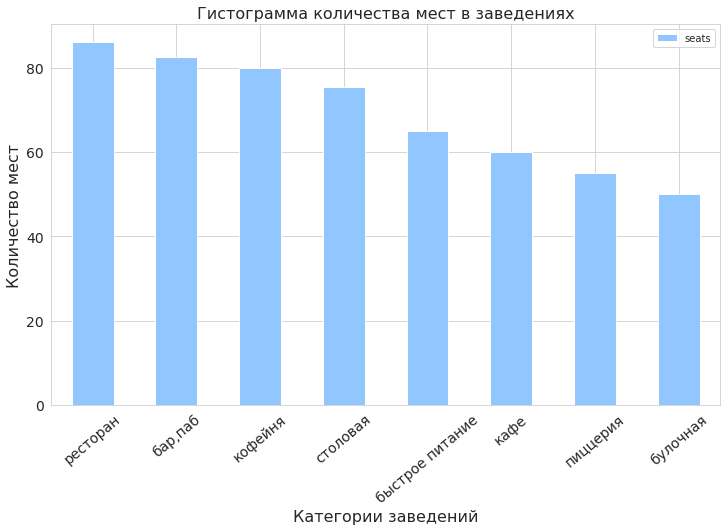

In [73]:
#Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. 
#Постройте визуализации. Проанализируйте результаты и сделайте выводы.
seats = data.groupby('category').agg({'seats':'median'}).sort_values(by = 'seats', ascending = False).reset_index()
print(seats)

plt.rcParams["figure.figsize"] = (12,7)
seats.plot(kind='bar', x='category', y='seats')
plt.xlabel('Категории заведений', fontsize=16)
plt.ylabel(r'Количество мест', fontsize=16)
plt.title('Гистограмма количества мест в заведениях',fontsize=16)
plt.xticks(rotation=40)
plt.rc('xtick', labelsize= 14) 
plt.rc('ytick', labelsize= 14) 

 ~~Суммарно больше всего посадочных мест в ресторанах(154 869 мест), кафе(118 770 мест) и кофейнях(83 511 мест). Меньше всего посадочных мест в столовых(16 359) и булочных (13 229).~~ 

В среднем, больше всего посадочных мест в ресторанах(86 на заведение) и барах/пабах(82). Меньше всего мест в булочных(50 на заведение) и пиццериях(55). В кофейнях, в среднем, 80 мест.

In [74]:
#Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?
data.groupby('chain')['name'].count()

chain
0    5186
1    3202
Name: name, dtype: int64

Несетевых заведений больше - 5201, а сетевых - 3205.

In [75]:
#Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.
#посмотрим количествоо несетевых заведений
data.query('chain==0').groupby('category')['name'].count().sort_values(ascending = False)

category
кафе               1599
ресторан           1300
кофейня             693
бар,паб             594
быстрое питание     371
пиццерия            303
столовая            227
булочная             99
Name: name, dtype: int64

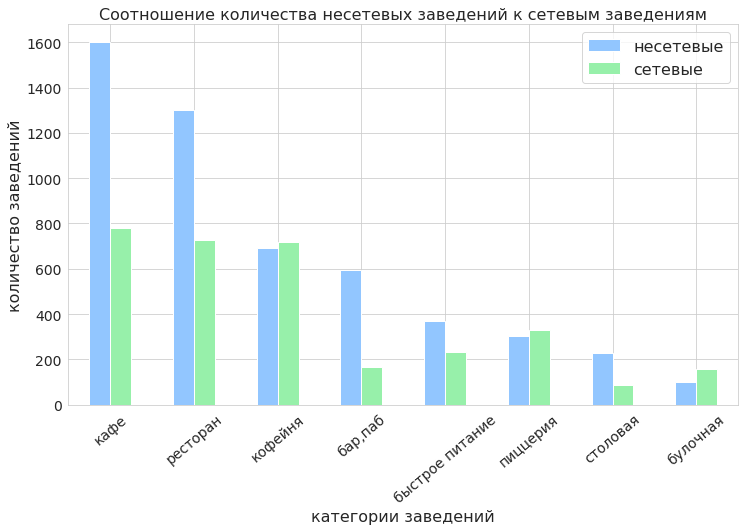

In [76]:
#оставим только сетевые заведения
chain = data.query('chain==1').groupby('category')['name'].count().sort_values(ascending = False).reset_index()
all = data.query('chain == 0').groupby('category')['name'].count().sort_values(ascending = False).reset_index()
chain_all = all.merge(chain, how='outer', on='category')
chain_all.plot(kind='bar', x='category')
plt.xlabel('категории заведений', fontsize=16)
plt.ylabel(r'количество заведений', fontsize=16)
plt.title('Соотношение количества несетевых заведений к сетевым заведениям',fontsize=16)
plt.xticks(rotation=40)
plt.rc('xtick', labelsize= 14) 
plt.rc('ytick', labelsize= 14)
plt.legend(['несетевые', 'сетевые'], fontsize=16)

Несетевых кафе и ресторанов больше, чем сетевых примерно в несколько раз.

Примерно одинаковое количество сетевых и несетевых кофейнь: 720 и 693.

Меньше всего среди сетевых заведений - столовых - 88, а несетевых столовых - 227.

Примерно одинаковое количество сетевых - 330 и несетевых пиццерий - 303.

Меньше всего среди несетевых заведений - булочных - 99, а сетевых булочных - 157.

Среди баров и пабов больше несетевых - 596, чем сетевых - 169

name                                 category
Шоколадница                          кофейня     118
Домино'с Пицца                       пиццерия     76
Додо Пицца                           пиццерия     74
One Price Coffee                     кофейня      71
Яндекс Лавка                         ресторан     69
Cofix                                кофейня      65
Prime                                ресторан     49
КОФЕПОРТ                             кофейня      42
Кулинарная лавка братьев Караваевых  кафе         39
Теремок                              ресторан     36
CofeFest                             кофейня      31
Чайхана                              кафе         26
Буханка                              булочная     25
Drive Café                           кафе         24
Кофемания                            кофейня      22
Name: category, dtype: int64


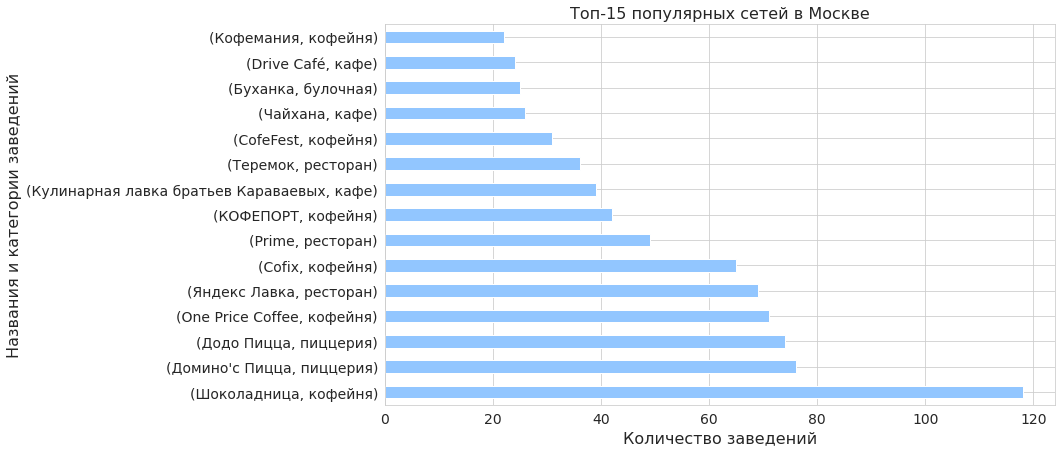

In [78]:
#Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. 
#Под популярностью понимается количество заведений этой сети в регионе. 
#Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? 
#Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?
top_15= data.query('chain==1').groupby('name')['category'].value_counts().sort_values(ascending=False).head(15)
print(top_15)

top_15.plot(kind='barh', x='name', y='count')
plt.xlabel('Количество заведений', fontsize=16)
plt.ylabel('Названия и категории заведений', fontsize=16)
plt.title('Топ-15 популярных сетей в Москве',fontsize=16)
plt.rc('xtick', labelsize= 14)
plt.rc('ytick', labelsize= 14)

Больше всего заведений у сети Шоколадница(120), Домино'с Пицца(76) и Додо Пицца(74). Меньше всего заведений среди самых популярных у Буханка(32), CofeFest(32) и Му-Му(27). Количество остальных заведений в других сетях - от 37 до 71.

Итак, мы имеем 6 сетей кофейнь, 3 сети ресторанов, 3 сети кафе, 2 сети пиццерии и 1 сеть булочной.

In [79]:
#Какие административные районы Москвы присутствуют в датасете? 
#Отобразите общее количество заведений и количество заведений каждой категории по районам. 
#Попробуйте проиллюстрировать эту информацию одним графиком.
display("В датасете присутствуют следующие административные районы Москвы:", data['district'].unique())

'В датасете присутствуют следующие административные районы Москвы:'

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Центральный административный округ         2231
Северный административный округ             898
Южный административный округ                891
Северо-Восточный административный округ     891
Западный административный округ             850
Восточный административный округ            795
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64


<AxesSubplot:>

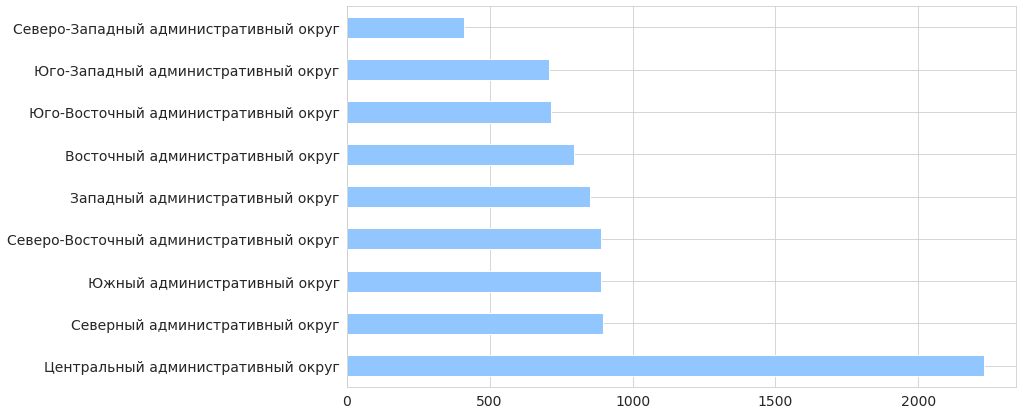

In [80]:
#общее количество заведений в разбивке по районам
print(data['district'].value_counts())
data['district'].value_counts().plot(kind='barh')
#plt.legend(['Количество заведений по округам'], fontsize=16)

Больше всего заведений в Центральном административном округе - 2242, меньше всего заведений в Северо-Западном административном округе. В остальных округах от 709 до 900 заведений.

In [81]:
table = pd.pivot_table(data, index=['district','category'],values=['name'], aggfunc=['count'], margins=True, margins_name='district', observed = False)

In [82]:
def pivot_table_w_subtotals(df, values, indices, columns, aggfunc, fill_value):
    listOfTable = []
    for indexNumber in range(len(indices)):
        n = indexNumber+1
        table = pd.pivot_table(df,values=values,index=indices[:n],columns=columns,aggfunc=aggfunc,fill_value=fill_value).reset_index()
        for column in indices[n:]:
            table[column] = ''
        listOfTable.append(table)
    concatTable = pd.concat(listOfTable).sort_index()
    concatTable = concatTable.set_index(keys=indices)
    return concatTable.sort_index(axis=0,ascending=True)

In [83]:
table_2 = pivot_table_w_subtotals(data, values=['name'], indices=['district','category'],columns=[],aggfunc='count',fill_value='')

          category  rating
0          бар,паб    4.39
1         пиццерия    4.30
2         ресторан    4.29
3          кофейня    4.28
4         булочная    4.27
5         столовая    4.21
6             кафе    4.12
7  быстрое питание    4.05


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

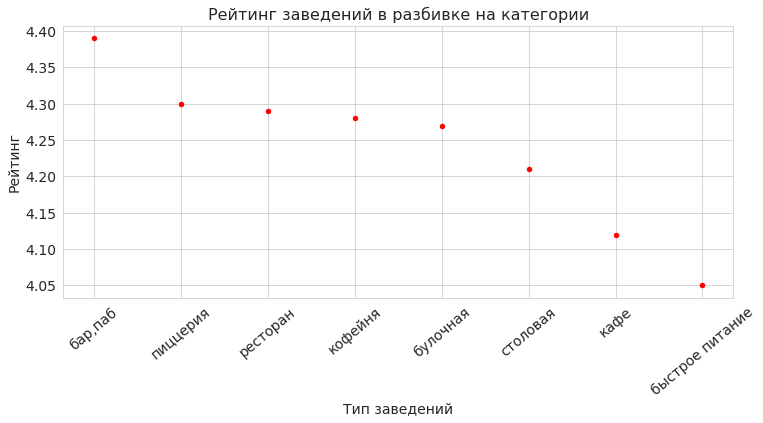

In [84]:
#Визуализируйте распределение средних рейтингов по категориям заведений. 
#Сильно ли различаются усреднённые рейтинги в разных типах общепита?
plt.rcParams["figure.figsize"] = (12,5)
rating =data.groupby('category')['rating'].mean().sort_values(ascending=False).round(2).reset_index()
print(rating)
rating.plot(kind='scatter',x='category', y='rating', color='red')
plt.xlabel('Тип заведений', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.title('Рейтинг заведений в разбивке на категории', fontsize=16)
plt.xticks(rotation=40)

Text(0.5, 1.0, 'Средний рейтинг заведений в разбивке на категории')

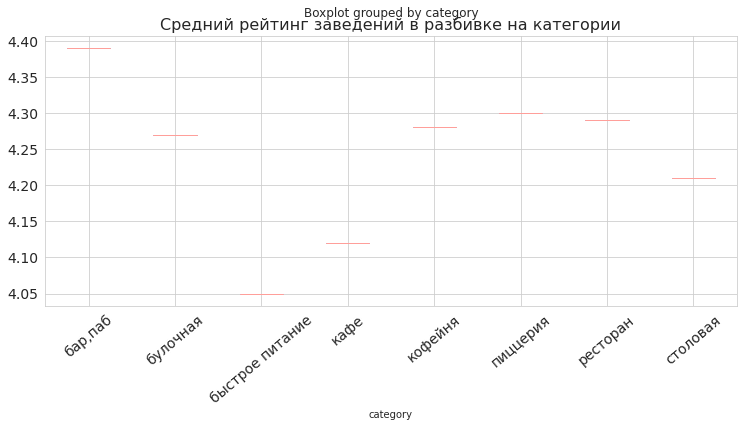

In [85]:
rating.boxplot(by='category', column='rating')
plt.xticks(rotation=40)
plt.title('Средний рейтинг заведений в разбивке на категории', fontsize=16)

Усреднённые рейтинги в разных типах общепита примерно одинаковы, колеблятся в диапазоне 4.05 - 4.39.
Меньше всего рейтинг у заведений быстрого питания, выше всего рейтинг у баров и пабов. У кофейнь средний рейтинг 4.28.

In [86]:
#Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. 
#Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson (скачать файл для локальной работы).

rating_district = data.groupby('district')['rating'].mean().round(2)
print(rating_district)
# загружаем JSON-файл с границами округов Москвы
state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
 
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
 
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)
 
# выводим карту
m

district
Восточный административный округ           4.17
Западный административный округ            4.18
Северный административный округ            4.24
Северо-Восточный административный округ    4.15
Северо-Западный административный округ     4.21
Центральный административный округ         4.38
Юго-Восточный административный округ       4.10
Юго-Западный административный округ        4.17
Южный административный округ               4.18
Name: rating, dtype: float64


Усреднённый рейтинг выше всего в Центральном округе - 4.38

In [87]:
#Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?
t = data.groupby('street')['name'].count().reset_index().rename(columns={'name':'count'})
t=t.query('count == 1')['street'].reset_index()
print(t.head())
print(t.count())

   index                      street
0      0    1-й Автозаводский проезд
1      1     1-й Балтийский переулок
2      2       1-й Варшавский проезд
3      3     1-й Вешняковский проезд
4      5   1-й Голутвинский переулок
index     456
street    456
dtype: int64


На 458 улицах по 1 заведению.

In [88]:
#создадим датафрейм с улицами, на которых по 1 объекту общепита
one_on_street = data.merge(t, on='street', how='right')
one_on_street.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7,index
0,Чайхана Азия,кафе,"Москва, 1-й Автозаводский проезд, 5",Южный административный округ,"ежедневно, круглосуточно",55.704847,37.657065,4.2,средние,Средний счёт:190–350 ₽,270.0,NaN,1,20.0,1-й Автозаводский проезд,True,0
1,Хуан Хэ,ресторан,"Москва, 1-й Балтийский переулок, 3/25",Северный административный округ,"ежедневно, 12:00–22:00",55.810418,37.518824,4.4,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,0,60.0,1-й Балтийский переулок,False,1
2,Колизей,кафе,"Москва, 1-й Варшавский проезд, 1Ас9",Южный административный округ,пн-чт 10:00–00:00; пт-вс 10:00–05:00,55.648674,37.627979,4.0,0,0,500.0,NaN,0,60.0,1-й Варшавский проезд,False,2
3,Deli by Shell,кафе,"Москва, 1-й Вешняковский проезд, 15",Юго-Восточный административный округ,0,55.723152,37.794014,3.4,0,0,450.0,NaN,0,60.0,1-й Вешняковский проезд,False,3
4,Shelby,"бар,паб","Москва, 1-й Голутвинский переулок, 6",Центральный административный округ,пн-пт 09:00–20:00,55.739600,37.613494,4.1,средние,Средний счёт:500–800 ₽,650.0,NaN,0,22.0,1-й Голутвинский переулок,False,5


In [89]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

Choropleth(
    geo_data=state_geo,
    #data=rating,
    columns=['district'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.1,
    legend_name='Улица ',
).add_to(m)
# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
one_on_street.apply(create_clusters, axis=1)

# выводим карту
m

In [90]:
#посмотрим сколько сетевых и несетвых
one_on_street['chain'].value_counts()

0    322
1    134
Name: chain, dtype: int64

In [91]:
#сравним средний чек заведений на этих улицах со средним чеком заведений на остальных улицах
print(data.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False))
print(one_on_street.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False))

district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64
district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64


Средний чек заведений на улицах, где всего одно заведение, такой же, как и средний чек всех заведений.

In [92]:
#посмотрим количетсво заведений в разбивке по категориям
one_on_street.groupby('category')['name'].count().sort_values(ascending=False)

category
кафе               160
ресторан            90
кофейня             85
бар,паб             39
столовая            36
быстрое питание     23
пиццерия            15
булочная             8
Name: name, dtype: int64

In [93]:
#посмотрим сколько среди этих заведений сетевых кофейнь 
one_on_street.query('chain == 1').query('category == "кофейня"')['name'].count()

33

Несетевых заведений на этих улицах больше, чем сетевых. Больше всего на этих улицах кафе(160) и ресторанов(90), меньше всего булочных(8). Всего 85 кофейнь, среди них 33 сетевых. Средний чек заведений на этих улицах такой же, как и во всех заведениях.

In [94]:
#Значения средних чеков заведений хранятся в столбце middle_avg_bill. 
#Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. 
#Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. 
#Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. 
#Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

avg_bill = data.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)

moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту

Choropleth(
    geo_data=state_geo,
    data=avg_bill,
    columns=['district'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    legend_name='Улица ',
).add_to(m)

# выводим карту
m

Больше всего средний чек в Центральном и Западном округах - по 1000 р., в остальных районах средний чек меньше 700р., самый маленький средний чек в Юго-Восточном округе(450р.)



* В данных представлены следующие категории заведений: кафе, ресторан, кофейня, пиццерия, бар,паб, быстрое питание, 
булочная, столовая. Больше всего кафе, ресторанов и кофейнь, меньше всего столовых и булочных.

    
* Несетевых заведений больше, чем сетевых. Чаще всего сетевыми являются кафе, рестораны и кофейни. Среди популярных сетевых заведений больше всего кофейнь.


* В датасете присутствуют следующие административные районы Москвы:

       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'
       
       
* Больше всего заведений в Центральном административном округе, меньше всего в Северо-Западном округе.


* Больше всего средний чек в Центральном округе и Западном округе, меньше всего в Юго-Восточном округе.


* Средний рейтинг заведений примерно одинаков (4.1-4.38), выше всего рейтинг в Центральном округе, ниже всего - в Юго-Восточном.


* Выше всего рейтинг у пабов,баров, ниже всего у быстрого питания, кофейни имеют средний рейтинг 4.28.


* Можно отметить, что в Юго-Восточном округе самый низкий чек и самый низкий рейтинг среди заведений.

## Детализируем исследование: открытие кофейни

In [95]:
data_coff = data.query('category == "кофейня"')
data_coff.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,0,Цена чашки капучино:155–185 ₽,650.0,170.0,0,80.0,улица Маршала Федоренко,False
25,В парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,0,0,650.0,NaN,1,80.0,парк Левобережный,False
45,9 Bar Coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,0,0,650.0,NaN,1,46.0,Коровинское шоссе,False
46,CofeFest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,0,0,650.0,NaN,1,80.0,улица Маршала Федоренко,False
52,Cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,0,0,650.0,NaN,1,80.0,улица Дыбенко,False


In [96]:
#Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?
display("Всего кофейнь:", data_coff['name'].count())
display("Всего уникальных названий кофейнь:", data_coff['name'].agg('nunique'))

'Всего кофейнь:'

1412

'Всего уникальных названий кофейнь:'

839

In [97]:
#Посмотрим распределение кофейнь на карте Москвы:
coff = data_coff.groupby('district')['name'].count().sort_values(ascending=False)
print(coff)

moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту

Choropleth(
    geo_data=state_geo,
    data=coff,
    columns=['district'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    legend_name='Кофейня',
).add_to(m)

# выводим карту
m

district
Центральный административный округ         428
Северный административный округ            193
Северо-Восточный административный округ    159
Западный административный округ            150
Южный административный округ               131
Восточный административный округ           104
Юго-Западный административный округ         96
Юго-Восточный административный округ        89
Северо-Западный административный округ      62
Name: name, dtype: int64


Больше всего кофейнь в Центральном административном округе (428), меньше всего в Северо-Западном округе(62) и Юго-Восточном(89). В Северном, Северо-Восточном, Западном, Южном и Восточном округах количество кофейнь от 105 до 193х.

In [98]:
#Есть ли круглосуточные кофейни?
data_coff.query('is_24_7 =="True"')['name'].count()

59

In [99]:
data_coff.query('is_24_7 =="True"').groupby('district')['name'].count()

district
Восточный административный округ            5
Западный административный округ             9
Северный административный округ             5
Северо-Восточный административный округ     3
Северо-Западный административный округ      2
Центральный административный округ         26
Юго-Восточный административный округ        1
Юго-Западный административный округ         7
Южный административный округ                1
Name: name, dtype: int64

В Москве 59 круглосуточных кофейнь.

In [100]:
#Какие у кофеен рейтинги? Как они распределяются по районам?
data_coff.groupby('district')['rating'].mean().round(2).sort_values(ascending=False)

district
Центральный административный округ         4.34
Северо-Западный административный округ     4.33
Северный административный округ            4.29
Восточный административный округ           4.28
Юго-Западный административный округ        4.28
Юго-Восточный административный округ       4.23
Южный административный округ               4.23
Северо-Восточный административный округ    4.22
Западный административный округ            4.20
Name: rating, dtype: float64

In [101]:
rating_data_coff = data_coff.groupby('district')['rating'].mean().round(2)
print(rating_data_coff)
# загружаем JSON-файл с границами округов Москвы
state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
 
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
 
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)
 
# выводим карту
m

district
Восточный административный округ           4.28
Западный административный округ            4.20
Северный административный округ            4.29
Северо-Восточный административный округ    4.22
Северо-Западный административный округ     4.33
Центральный административный округ         4.34
Юго-Восточный административный округ       4.23
Юго-Западный административный округ        4.28
Южный административный округ               4.23
Name: rating, dtype: float64


Выше всего рейтинги кофеен в Центральном районе, возможно, это связано с тем, что в Центральном районе в несколько раз больше кофейнь, чем в остальных районах.

В целом, рейтинг кофейнь во всех округах примерно одинаковый - от 4.2 до 4.34.

In [102]:
#На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

Посмотрим основные статистические характеристики столбца middle_coffee_cup для кофейнь:

In [103]:
data_coff['middle_coffee_cup'].describe()

count    520.000000
mean     172.376923
std       65.767854
min       60.000000
25%      124.000000
50%      169.500000
75%      225.000000
max      375.000000
Name: middle_coffee_cup, dtype: float64

In [104]:
avg_bill_coff = data_coff.groupby('district')['middle_coffee_cup'].median().sort_values(ascending=False)
print(avg_bill_coff)
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту

Choropleth(
    geo_data=state_geo,
    data=avg_bill,
    columns=['district'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    legend_name='Улица ',
).add_to(m)

# выводим карту
m

district
Юго-Западный административный округ        198.0
Центральный административный округ         190.0
Западный административный округ            189.0
Северо-Западный административный округ     165.0
Северо-Восточный административный округ    162.5
Северный административный округ            159.0
Южный административный округ               150.0
Юго-Восточный административный округ       147.5
Восточный административный округ           135.0
Name: middle_coffee_cup, dtype: float64


Самый дорогой капучино - 375р., самый дешёвый капучино - 60 руб. Средняя цена чашки капучино 170р. 

При открытии стоит ориентироваться на среднюю цену, так как сначала необходимо наработать рейтинг и клиентов, а высокая стоимость может отпугнуть потенциальных клиентов. Низкие цены ставить также нельзя, потому что тогда кофейня может работать в убыток.

## Вывод 

В ходе исследования мы изучили рынок общественного питания в Москве, а именно, сделали предобработку и анализ данных, изучили распределение заведений по округам, посмотрели рейтинги заведений, изучили средние чеки.

Мы получили следующие выводы: в Москве больше всего заведений в Центральном округе, среди них больше всего кафе, ресторанов и кофейнь, меньше всего булочных и столовых; несетевых заведений больше чем сетевых; средний чек выше всего в Центральном и Западном округах, ниже всего в Юго-Восточном округе. Самый высокий рейтинг у заведений в Центральном районе, а самый низкий в Юго-Восточном; больше всего кофейнь в Цетральном округе(428), меньше всего Северо-Западном(62); при открытии кофейни стоит ориентироваться на среднюю стоимость чашки капучино 170р; рейтинг кофейнь во всех округах примерно одинаков; в Москве есть 59 круглосуточных кофейнь, среди них 26 находятся в Центральном округе

Презентация: https://disk.yandex.ru/i/QFGe0FrRy51x4w